<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             650 non-null    int64  
 1   Product                          650 non-null    object 
 2   India_Exports                    650 non-null    int64  
 3   Global_Exports                   650 non-null    int64  
 4   India_Export_Percentage          650 non-null    float64
 5   Export_Rank                      650 non-null    int64  
 6   Prev_Exports                     633 non-null    float64
 7   Export_Growth_Percentage         633 non-null    float64
 8   India_Imports                    650 non-null    int64  
 9   Global_Imports                   650 non-null    int64  
 10  India_Import_Percentage          650 non-null    float64
 11  Import_Rank                      650 non-null    int64  
 12  Prev_Imports          

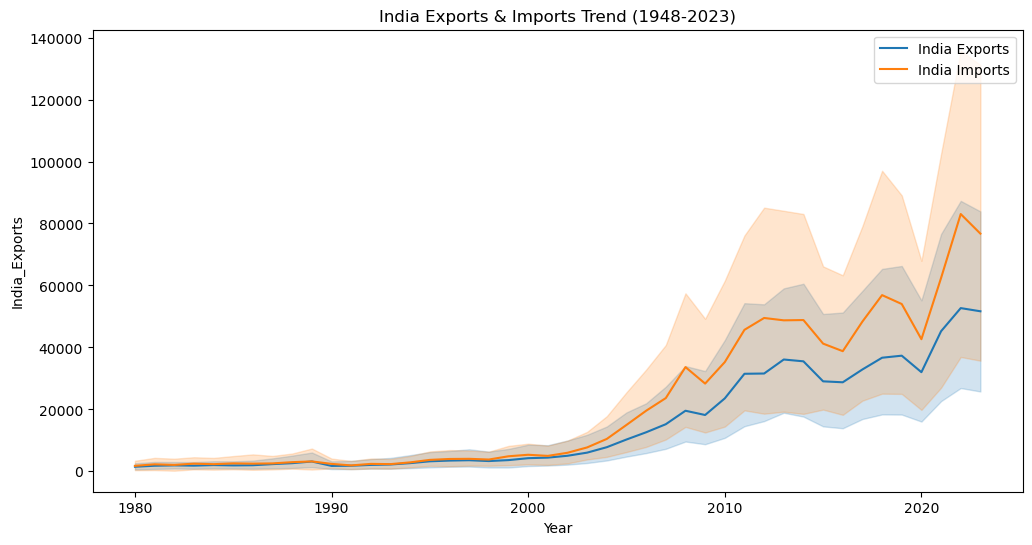

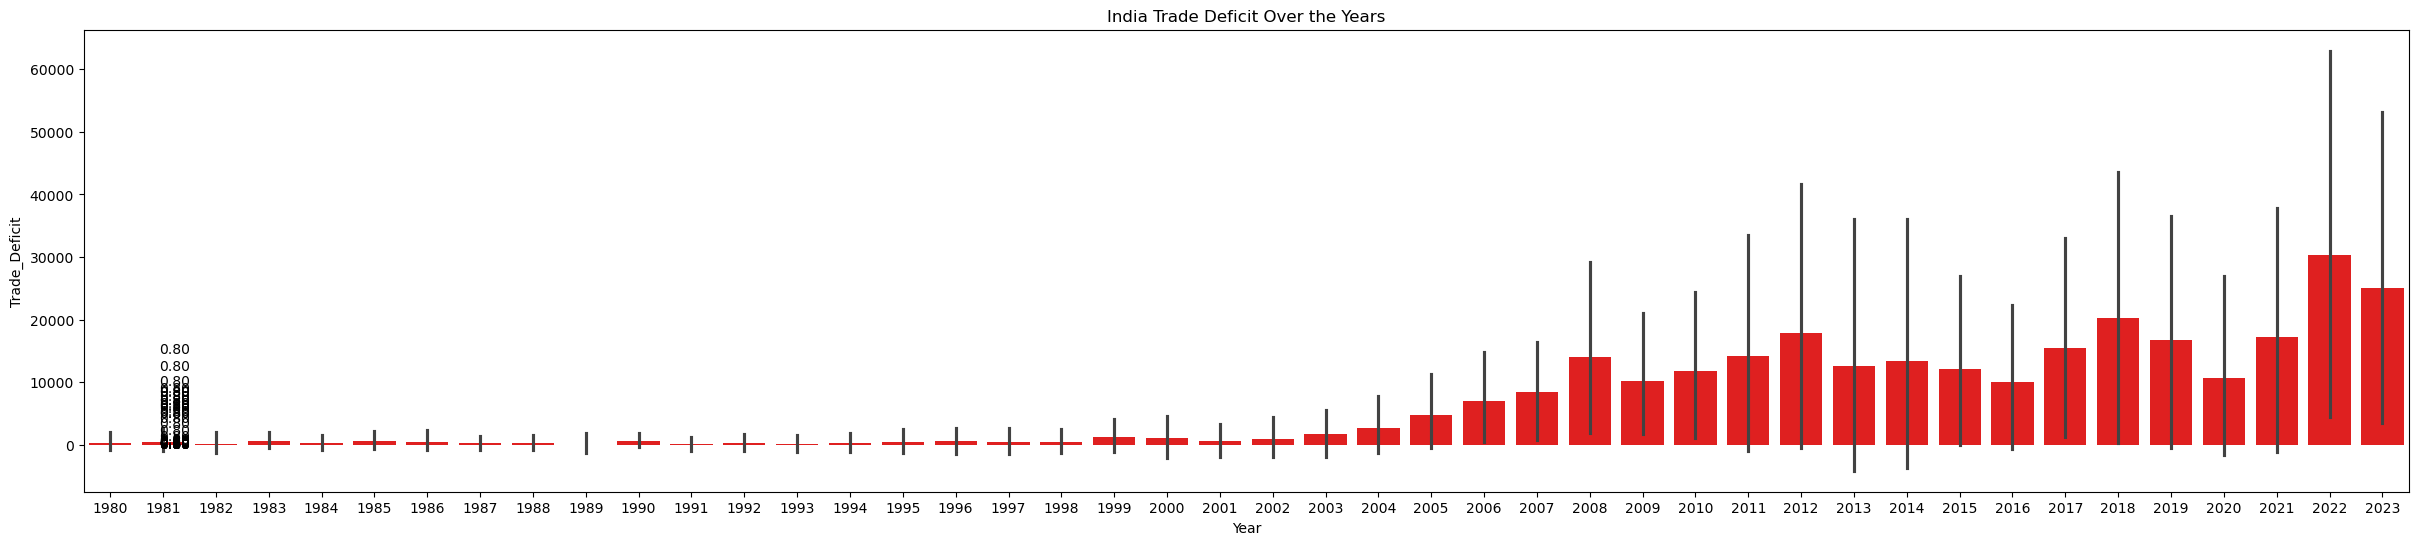

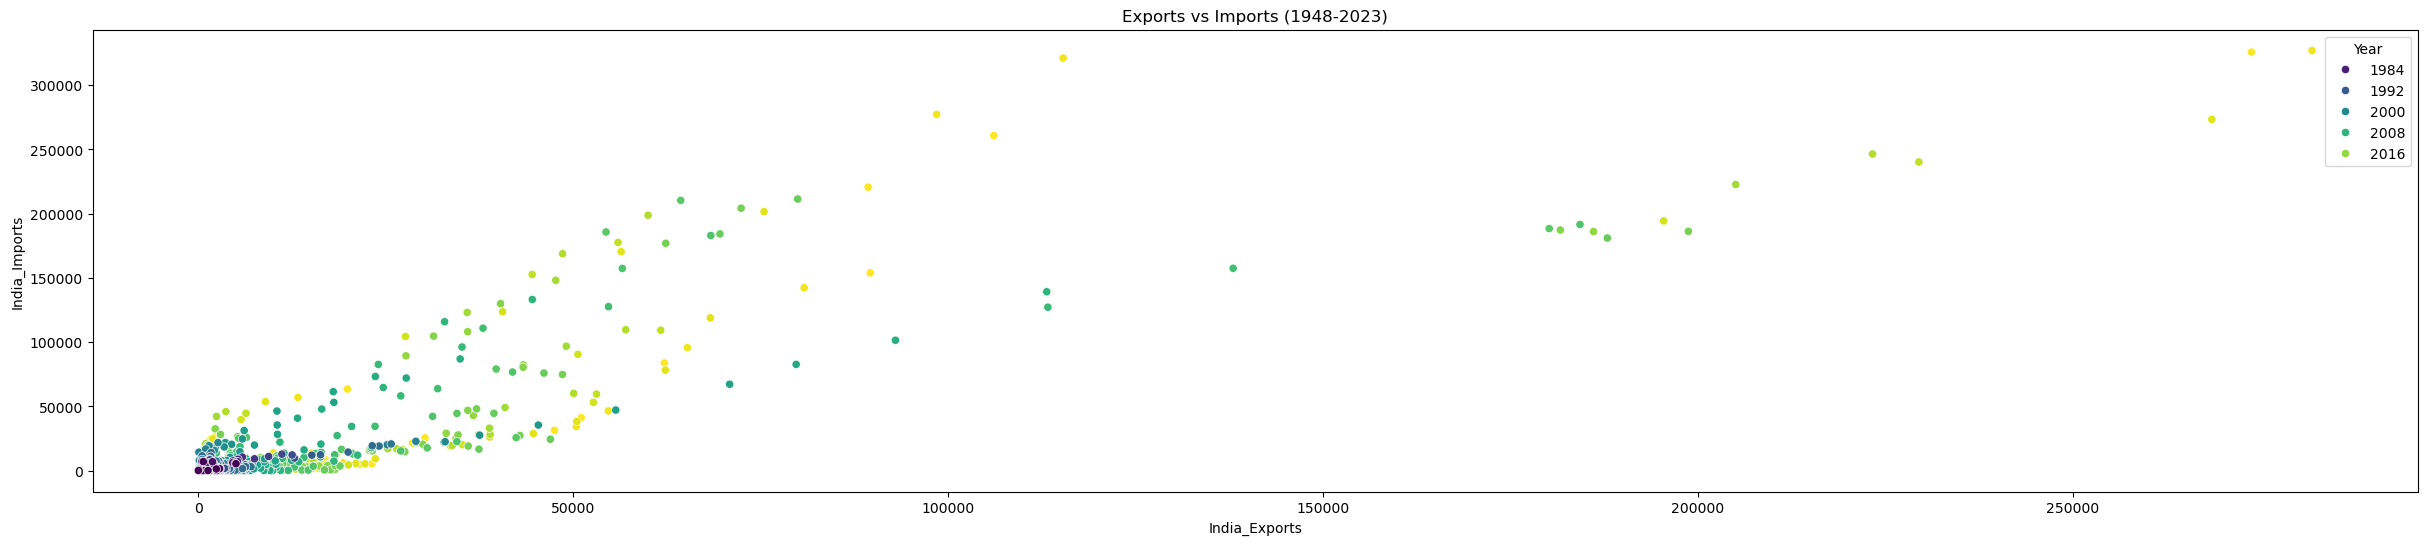

C:\Users\chemi\AppData\Local\Temp\ipykernel_16940\3651467950.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_2023.sort_values(by='India_Exports', ascending=False), x='India_Exports', y='Product', palette='Blues_r')


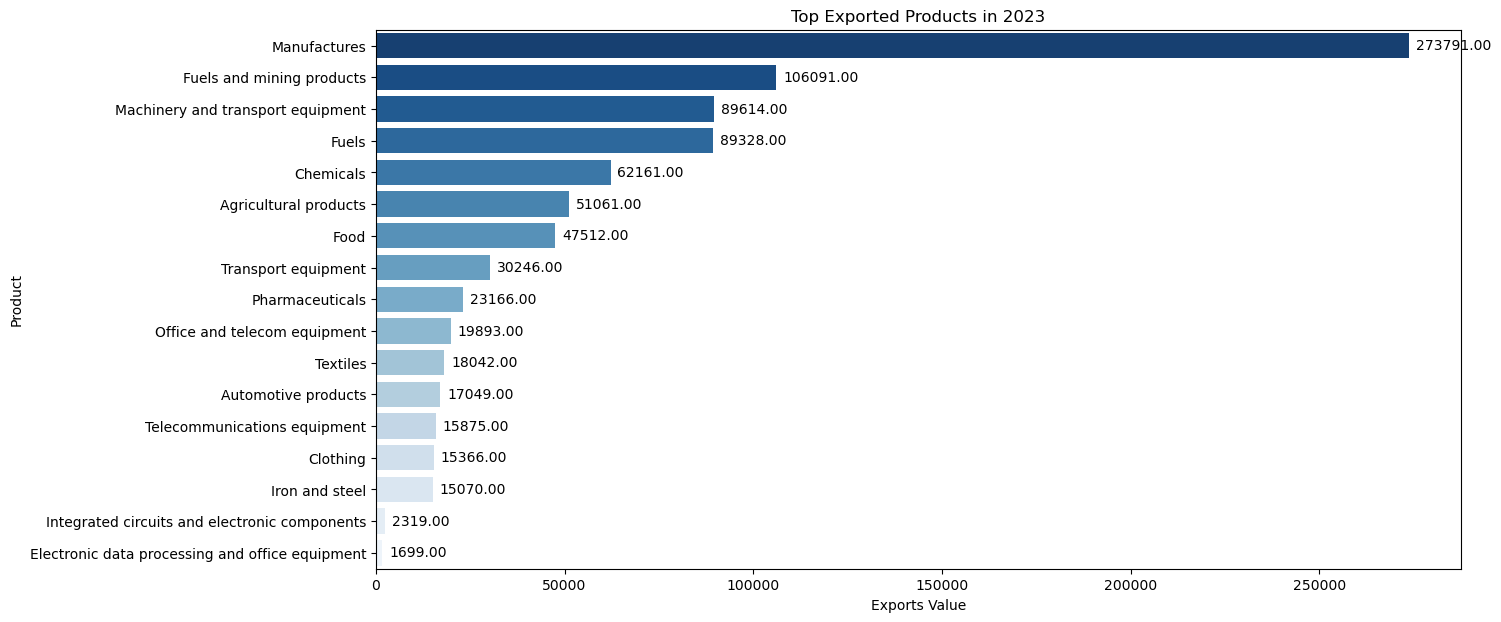

C:\Users\chemi\AppData\Local\Temp\ipykernel_16940\3651467950.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_2023.sort_values(by='India_Imports', ascending=False), x='India_Imports', y='Product', palette='Reds_r')


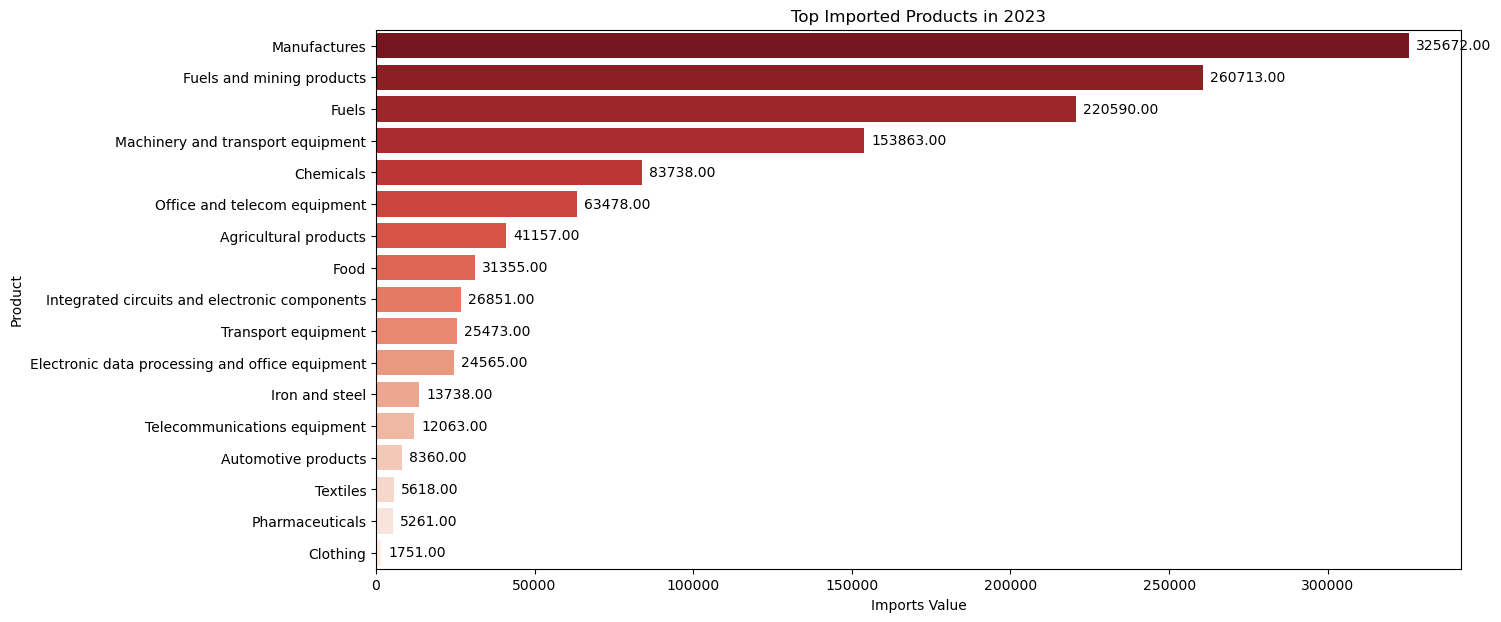

C:\Users\chemi\AppData\Local\Temp\ipykernel_16940\3651467950.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_2023.sort_values(by='Trade_Deficit', ascending=False), x='Trade_Deficit', y='Product', palette='Purples_r')


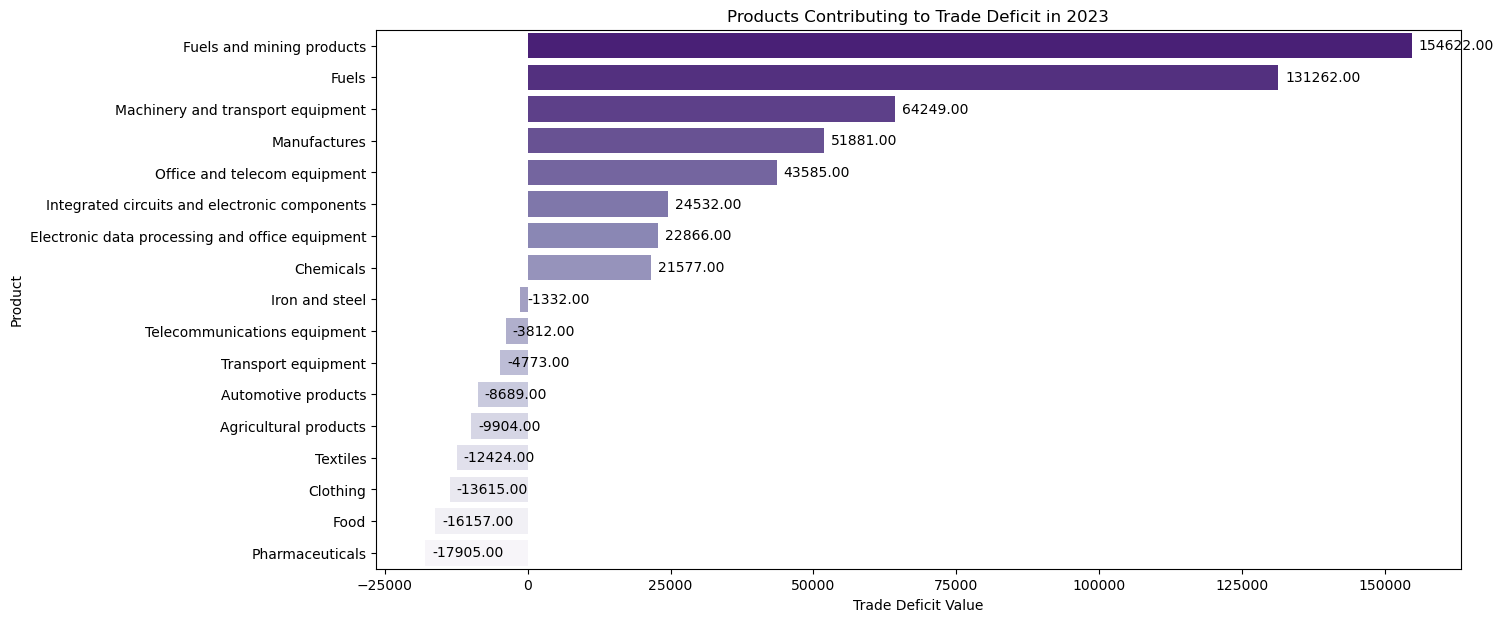

C:\Users\chemi\AppData\Local\Temp\ipykernel_16940\3651467950.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_2023.sort_values(by='Export_Growth_Percentage', ascending=False), x='Export_Growth_Percentage', y='Product', palette='Greens_r')


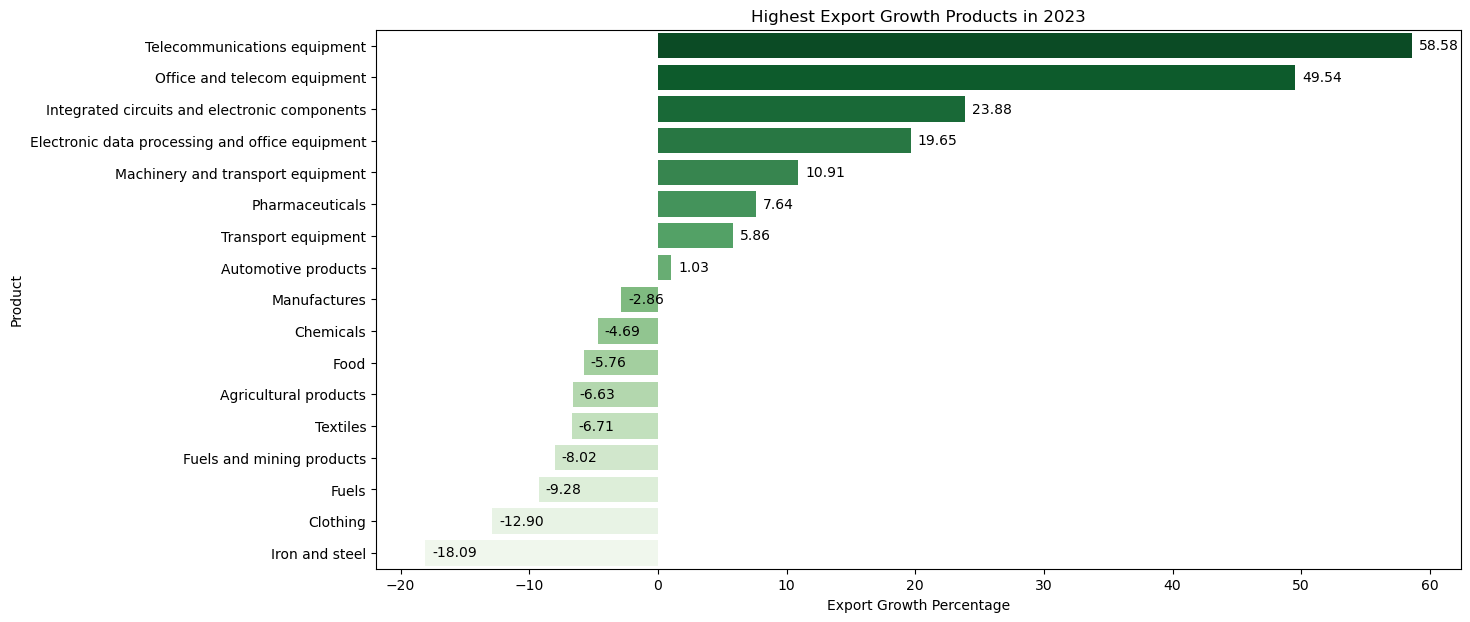

C:\Users\chemi\AppData\Local\Temp\ipykernel_16940\3651467950.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_2023.sort_values(by='Import_Growth_Percentage', ascending=False), x='Import_Growth_Percentage', y='Product', palette='Oranges_r')


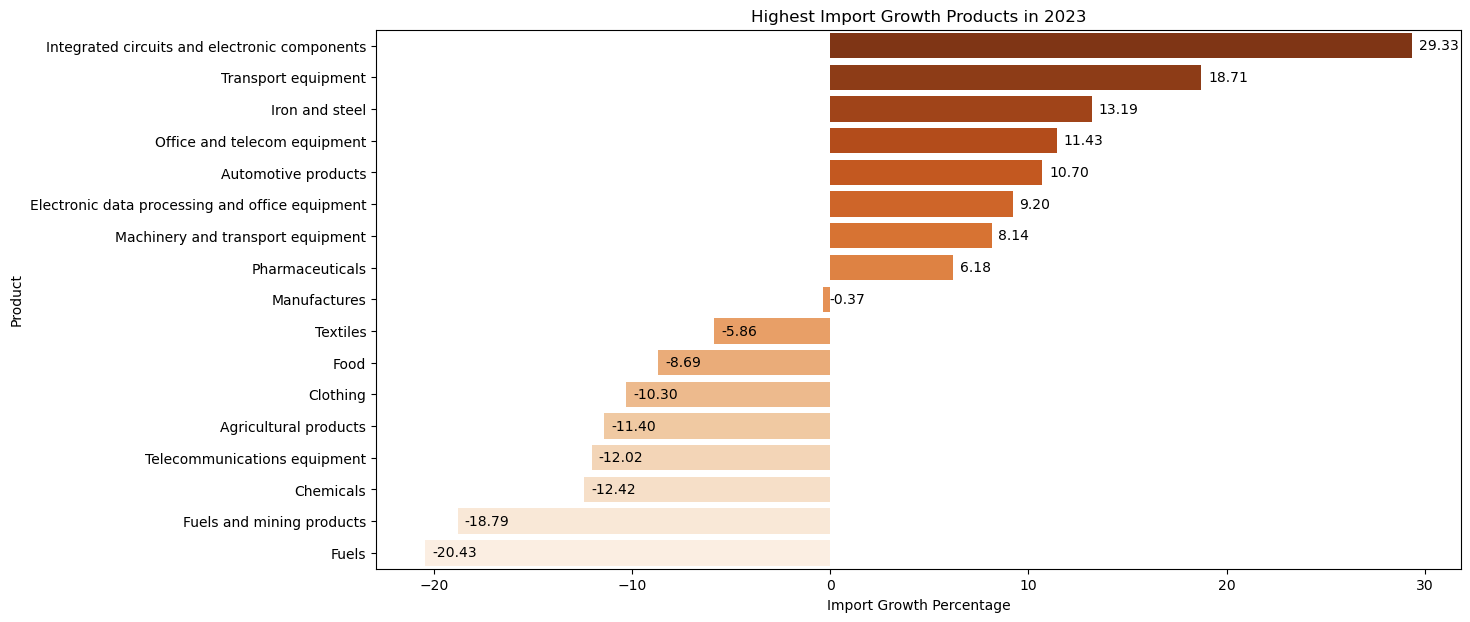

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

# Load Data
file_path = r"C:\Users\chemi\Downloads\PROJECT -World Merchandise Trade  (Bigquery Project)\BigQuery Output Result\India's product-wise Trade performance  (1948-2023).csv"
df = pd.read_csv(file_path)

# Data Overview
df.info()
df.describe()

# Filter Data for 2023
df_2023 = df[df['Year'] == 2023]

def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.2f'), 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                    textcoords='offset points')

def generate_visualizations(df, df_2023):
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=df, x='Year', y='India_Exports', label='India Exports')
    sns.lineplot(data=df, x='Year', y='India_Imports', label='India Imports')
    plt.title('India Exports & Imports Trend (1948-2023)')
    plt.legend()
    plt.savefig("trade_trend.png")
    plt.show()
    
    plt.figure(figsize=(30, 6))
    ax = sns.barplot(data=df, x='Year', y='Trade_Deficit', color='red')
    plt.title('India Trade Deficit Over the Years')
    add_data_labels(ax)
    plt.savefig("trade_deficit.png")
    plt.show()
    
    plt.figure(figsize=(30, 6))
    ax = sns.scatterplot(data=df, x='India_Exports', y='India_Imports', hue='Year', palette='viridis')
    plt.title('Exports vs Imports (1948-2023)')
    plt.savefig("exports_vs_imports.png")
    plt.show()
    
    # Product-wise visualizations for 2023
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=df_2023.sort_values(by='India_Exports', ascending=False), x='India_Exports', y='Product', palette='Blues_r')
    plt.title('Top Exported Products in 2023')
    plt.xlabel('Exports Value')
    plt.ylabel('Product')
    add_data_labels(ax)
    plt.savefig("top_exports_2023.png")
    plt.show()
    
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=df_2023.sort_values(by='India_Imports', ascending=False), x='India_Imports', y='Product', palette='Reds_r')
    plt.title('Top Imported Products in 2023')
    plt.xlabel('Imports Value')
    plt.ylabel('Product')
    add_data_labels(ax)
    plt.savefig("top_imports_2023.png")
    plt.show()
    
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=df_2023.sort_values(by='Trade_Deficit', ascending=False), x='Trade_Deficit', y='Product', palette='Purples_r')
    plt.title('Products Contributing to Trade Deficit in 2023')
    plt.xlabel('Trade Deficit Value')
    plt.ylabel('Product')
    add_data_labels(ax)
    plt.savefig("trade_deficit_products_2023.png")
    plt.show()
    
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=df_2023.sort_values(by='Export_Growth_Percentage', ascending=False), x='Export_Growth_Percentage', y='Product', palette='Greens_r')
    plt.title('Highest Export Growth Products in 2023')
    plt.xlabel('Export Growth Percentage')
    plt.ylabel('Product')
    add_data_labels(ax)
    plt.savefig("export_growth_2023.png")
    plt.show()
    
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=df_2023.sort_values(by='Import_Growth_Percentage', ascending=False), x='Import_Growth_Percentage', y='Product', palette='Oranges_r')
    plt.title('Highest Import Growth Products in 2023')
    plt.xlabel('Import Growth Percentage')
    plt.ylabel('Product')
    add_data_labels(ax)
    plt.savefig("import_growth_2023.png")
    plt.show()

def generate_pdf_report(df):
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()
    pdf.set_font("Arial", style='B', size=16)
    pdf.cell(200, 10, "India's Product-wise Trade Performance (1948-2023)", ln=True, align='C')
    
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, "This report provides an analysis of India's trade performance, including exports, imports, and trade deficits across different products.")
    pdf.image("trade_trend.png", x=10, y=None, w=180)
    pdf.image("trade_deficit.png", x=10, y=None, w=180)
    pdf.image("exports_vs_imports.png", x=10, y=None, w=180)
    pdf.image("top_exports_2023.png", x=10, y=None, w=180)
    pdf.image("top_imports_2023.png", x=10, y=None, w=180)
    pdf.image("trade_deficit_products_2023.png", x=10, y=None, w=180)
    pdf.image("export_growth_2023.png", x=10, y=None, w=180)
    pdf.image("import_growth_2023.png", x=10, y=None, w=180)
    
    pdf.output("India_Trade_Final_Report.pdf")

# Perform Analysis
generate_visualizations(df, df_2023)
generate_pdf_report(df)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

# Load Data
file_path = r"C:\Users\chemi\Downloads\PROJECT -World Merchandise Trade  (Bigquery Project)\BigQuery Output Result\India's product-wise Trade performance  (1948-2023).csv"
df = pd.read_csv(file_path)

# Filter Data for 2023
df_2023 = df[df['Year'] == 2023]

def add_data_labels(ax):
    """Adds data labels to bar charts."""
    for p in ax.patches:
        if p.get_width() > 0:  # Avoid labeling bars with zero width
            ax.annotate(f"{p.get_width():.2f}", 
                        (p.get_width(), p.get_y() + p.get_height() / 2), 
                        ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                        textcoords='offset points')

def generate_visualizations(df, df_2023):
    """Generates and saves all required charts."""
    charts = [
        ("India Exports & Imports Trend (1948-2023)", "trade_trend.png", sns.lineplot, {'data': df, 'x': 'Year', 'y': 'India_Exports'}),
        ("India Trade Deficit Over the Years", "trade_deficit.png", sns.barplot, {'data': df, 'x': 'Year', 'y': 'Trade_Deficit', 'color': 'red'}),
        ("Exports vs Imports (1948-2023)", "exports_vs_imports.png", sns.scatterplot, {'data': df, 'x': 'India_Exports', 'y': 'India_Imports', 'hue': 'Year', 'palette': 'viridis'}),
        ("Top Exported Products in 2023", "top_exports_2023.png", sns.barplot, {'data': df_2023.sort_values(by='India_Exports', ascending=False), 'x': 'India_Exports', 'y': 'Product', 'palette': 'Blues_r'}),
        ("Top Imported Products in 2023", "top_imports_2023.png", sns.barplot, {'data': df_2023.sort_values(by='India_Imports', ascending=False), 'x': 'India_Imports', 'y': 'Product', 'palette': 'Reds_r'}),
        ("Products Contributing to Trade Deficit in 2023", "trade_deficit_products_2023.png", sns.barplot, {'data': df_2023.sort_values(by='Trade_Deficit', ascending=False), 'x': 'Trade_Deficit', 'y': 'Product', 'palette': 'Purples_r'}),
        ("Highest Export Growth Products in 2023", "export_growth_2023.png", sns.barplot, {'data': df_2023.sort_values(by='Export_Growth_Percentage', ascending=False), 'x': 'Export_Growth_Percentage', 'y': 'Product', 'palette': 'Greens_r'}),
        ("Highest Import Growth Products in 2023", "import_growth_2023.png", sns.barplot, {'data': df_2023.sort_values(by='Import_Growth_Percentage', ascending=False), 'x': 'Import_Growth_Percentage', 'y': 'Product', 'palette': 'Oranges_r'})
    ]
    
    for title, filename, plot_func, plot_args in charts:
        plt.figure(figsize=(14, 7))
        ax = plot_func(**plot_args)  # Create the main plot
        plt.title(title, fontsize=14)
        if "barplot" in str(plot_func):  # Add labels for bar charts
            add_data_labels(ax)
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks(rotation=45)
        plt.savefig(filename, bbox_inches='tight')
        plt.close()

def generate_pdf_report():
    """Generates a structured PDF report with each chart on a separate page."""
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    
    # Cover Page
    pdf.add_page()
    pdf.set_font("Arial", style='B', size=16)
    pdf.cell(200, 10, "India's Product-wise Trade Performance (1948-2023)", ln=True, align='C')
    pdf.ln(10)
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, "This report analyzes India's trade performance, including exports, imports, and trade deficits across different products.")

    # Add Charts - Each on a Separate Page
    charts = [
        ("India Exports & Imports Trend (1948-2023)", "trade_trend.png"),
        ("India Trade Deficit Over the Years", "trade_deficit.png"),
        ("Exports vs Imports (1948-2023)", "exports_vs_imports.png"),
        ("Top Exported Products in 2023", "top_exports_2023.png"),
        ("Top Imported Products in 2023", "top_imports_2023.png"),
        ("Products Contributing to Trade Deficit in 2023", "trade_deficit_products_2023.png"),
        ("Highest Export Growth Products in 2023", "export_growth_2023.png"),
        ("Highest Import Growth Products in 2023", "import_growth_2023.png")
    ]

    for title, image in charts:
        pdf.add_page()
        pdf.set_font("Arial", style='B', size=14)
        pdf.cell(0, 10, title, ln=True, align='C')
        pdf.ln(5)
        pdf.image(image, x=10, y=None, w=180)

    # Save the PDF
    pdf.output("India_Trade_Final_Report_.pdf")

# Run Analysis
generate_visualizations(df, df_2023)
generate_pdf_report()



C:\Users\chemi\AppData\Local\Temp\ipykernel_16940\2487304604.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = plot_func(**plot_args)  # Create the main plot
C:\Users\chemi\AppData\Local\Temp\ipykernel_16940\2487304604.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = plot_func(**plot_args)  # Create the main plot
C:\Users\chemi\AppData\Local\Temp\ipykernel_16940\2487304604.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = plot_func(**plot_args)  # Create the main plot
C:\Users\chemi\AppData\Local\Temp\ipykernel_16940\2487304604.py:37: FutureWarning: 

